<span style="color:blue;font-weight:700;font-size:25px">
    Importando a biblioteca
</span>

In [ ]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

<span style="color:blue;font-weight:700;font-size:25px">
    Importando o dataset
</span>

In [3]:
#data = pd.read_csv ("data\\diabetes.csv")

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/henriqueserafin/diabetes/refs/heads/main/data/diabetes.csv"

data = pd.read_csv(url)

data.head()


,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoFamiliarDiabetes,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<span style="color:blue;font-weight:700;font-size:25px">
    Criando um dataframe
</span>

In [41]:
df = pd.DataFrame (data)
df.head()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoFamiliarDiabetes,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Traduzindo os nomes das colunas para português
df.rename(columns={
    'Pregnancies': 'Gravidezes',
    'Glucose': 'Glicose',
    'BloodPressure': 'PressaoSanguinea',
    'SkinThickness': 'EspessuraPele',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'HistoricoFamiliarDiabetes',
    'Age': 'Idade',
    'Outcome': 'Resultado'
}, inplace=True)

# Mostrando as primeiras linhas com os novos nomes
df.head()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoFamiliarDiabetes,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<span style="color:blue;font-weight:700;font-size:25px">
    Data Shape and information
</span>

In [36]:
print ("Número de linhas: {}" . format (df.shape [0]))
print ("Número de colunas: {}" . format (df.shape [1]))

Número de linhas: 768
Número de colunas: 9


In [8]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gravidezes                 768 non-null    int64  
 1   Glicose                    768 non-null    int64  
 2   PressaoSanguinea           768 non-null    int64  
 3   EspessuraPele              768 non-null    int64  
 4   Insulina                   768 non-null    int64  
 5   IMC                        768 non-null    float64
 6   HistoricoFamiliarDiabetes  768 non-null    float64
 7   Idade                      768 non-null    int64  
 8   Resultado                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe ()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoFamiliarDiabetes,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.columns

Index(['Gravidezes', 'Glicose', 'PressaoSanguinea', 'EspessuraPele',
       'Insulina', 'IMC', 'HistoricoFamiliarDiabetes', 'Idade', 'Resultado'],
      dtype='object')

<span style="color:blue;font-weight:700;font-size:25px">
    Verificando valores vazios:
</span>

In [11]:
df.isnull().sum()

Gravidezes                   0
Glicose                      0
PressaoSanguinea             0
EspessuraPele                0
Insulina                     0
IMC                          0
HistoricoFamiliarDiabetes    0
Idade                        0
Resultado                    0
dtype: int64

<span style="color:blue;font-weight:700;font-size:25px">
    Verificando possiveis respostas na coluna de resultado
</span>  

In [12]:
print(df['Resultado'].unique())

[1 0]


<span style="color:blue;font-weight:700;font-size:25px">
    Correlação (pesos)
</span>

In [13]:
df.corr()

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoFamiliarDiabetes,Idade,Resultado
Gravidezes,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
PressaoSanguinea,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
EspessuraPele,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
HistoricoFamiliarDiabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Graph'}>

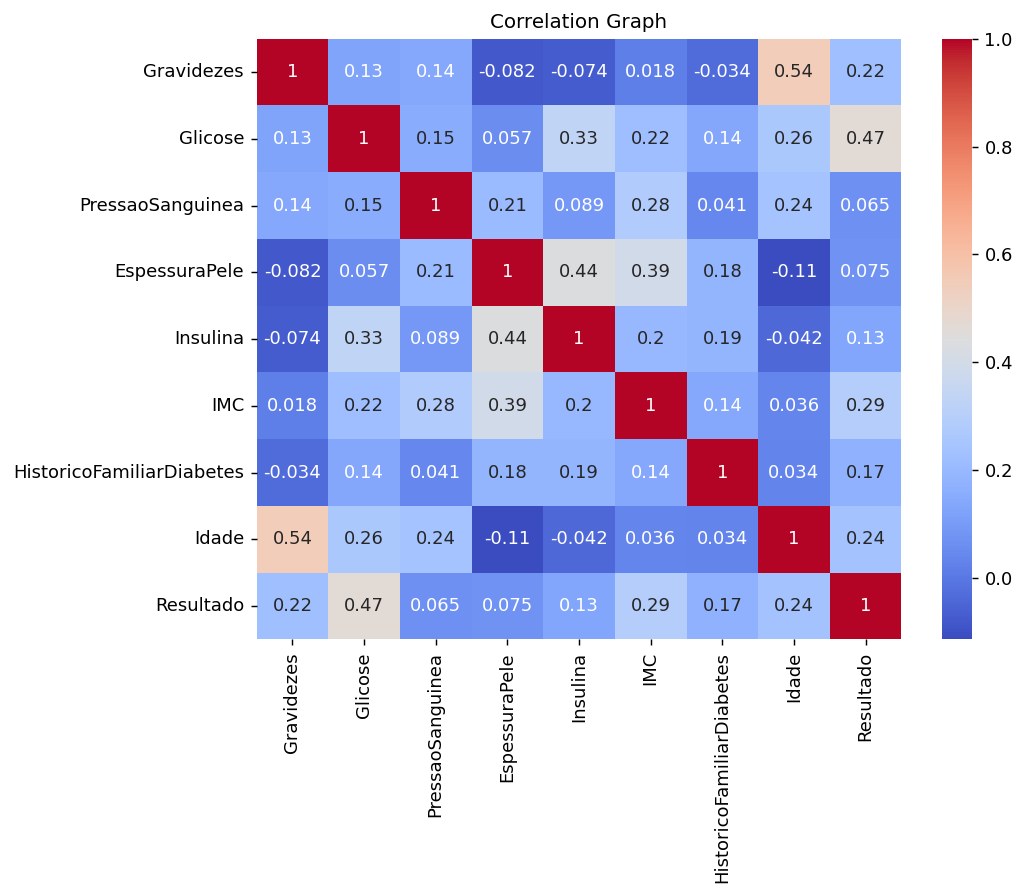

In [14]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

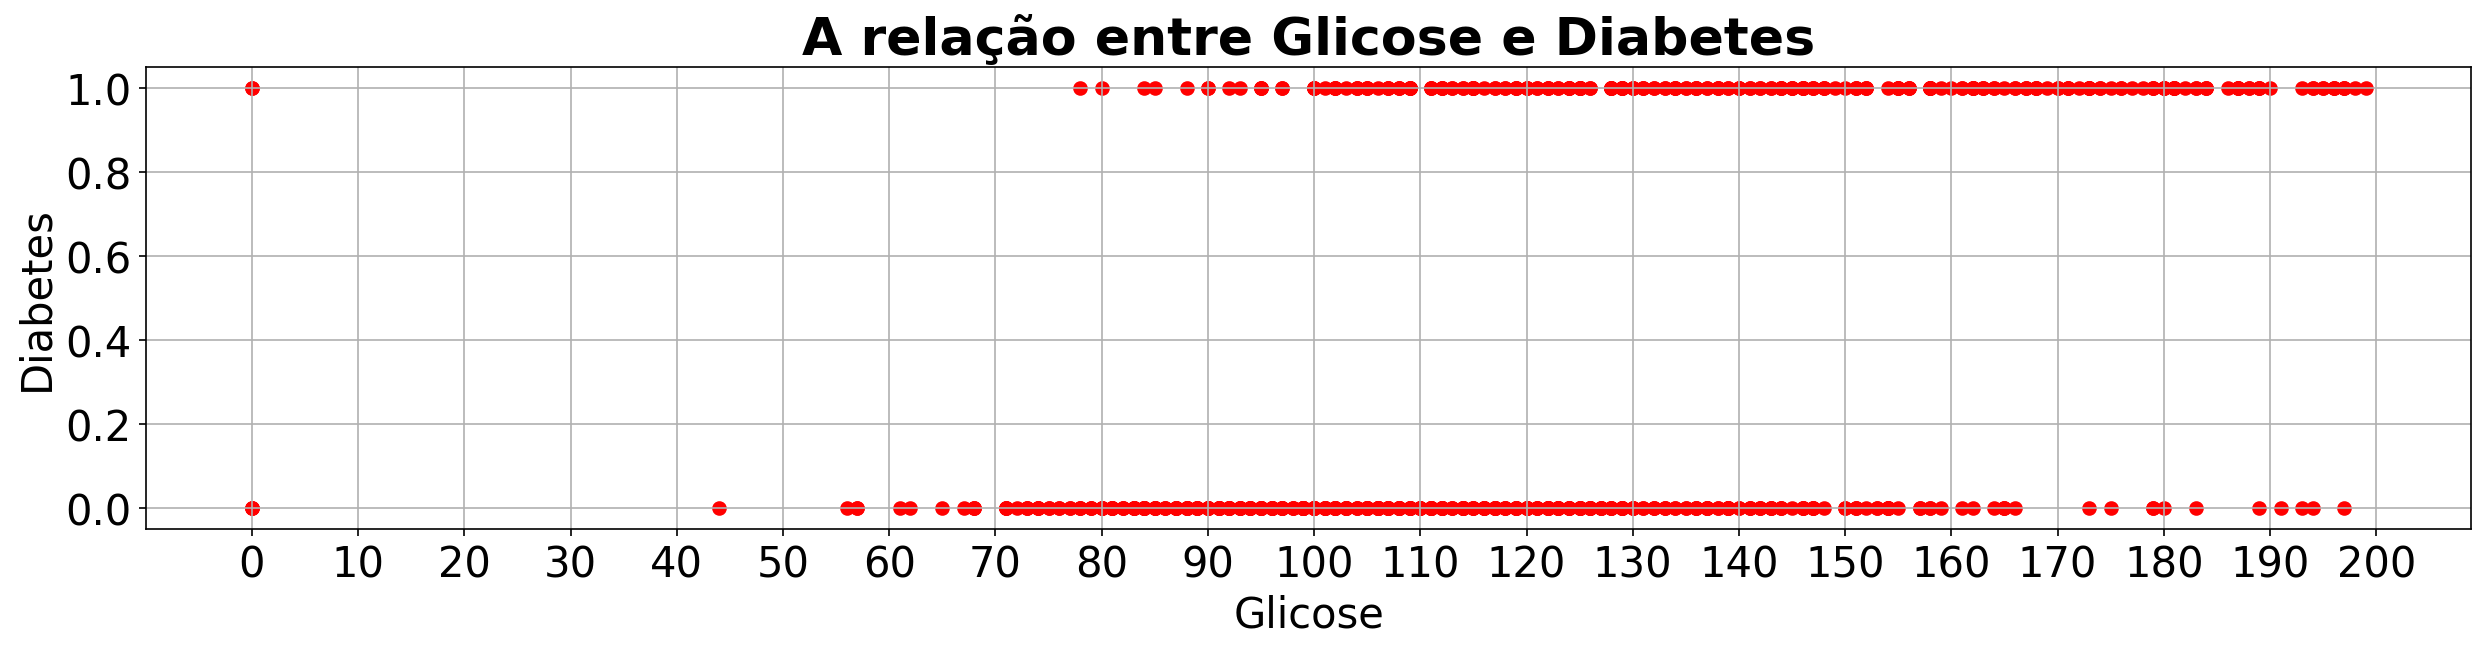

In [15]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (df["Glicose"] , df["Resultado"] , color = "red")
plt.title ("A relação entre Glicose e Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glicose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

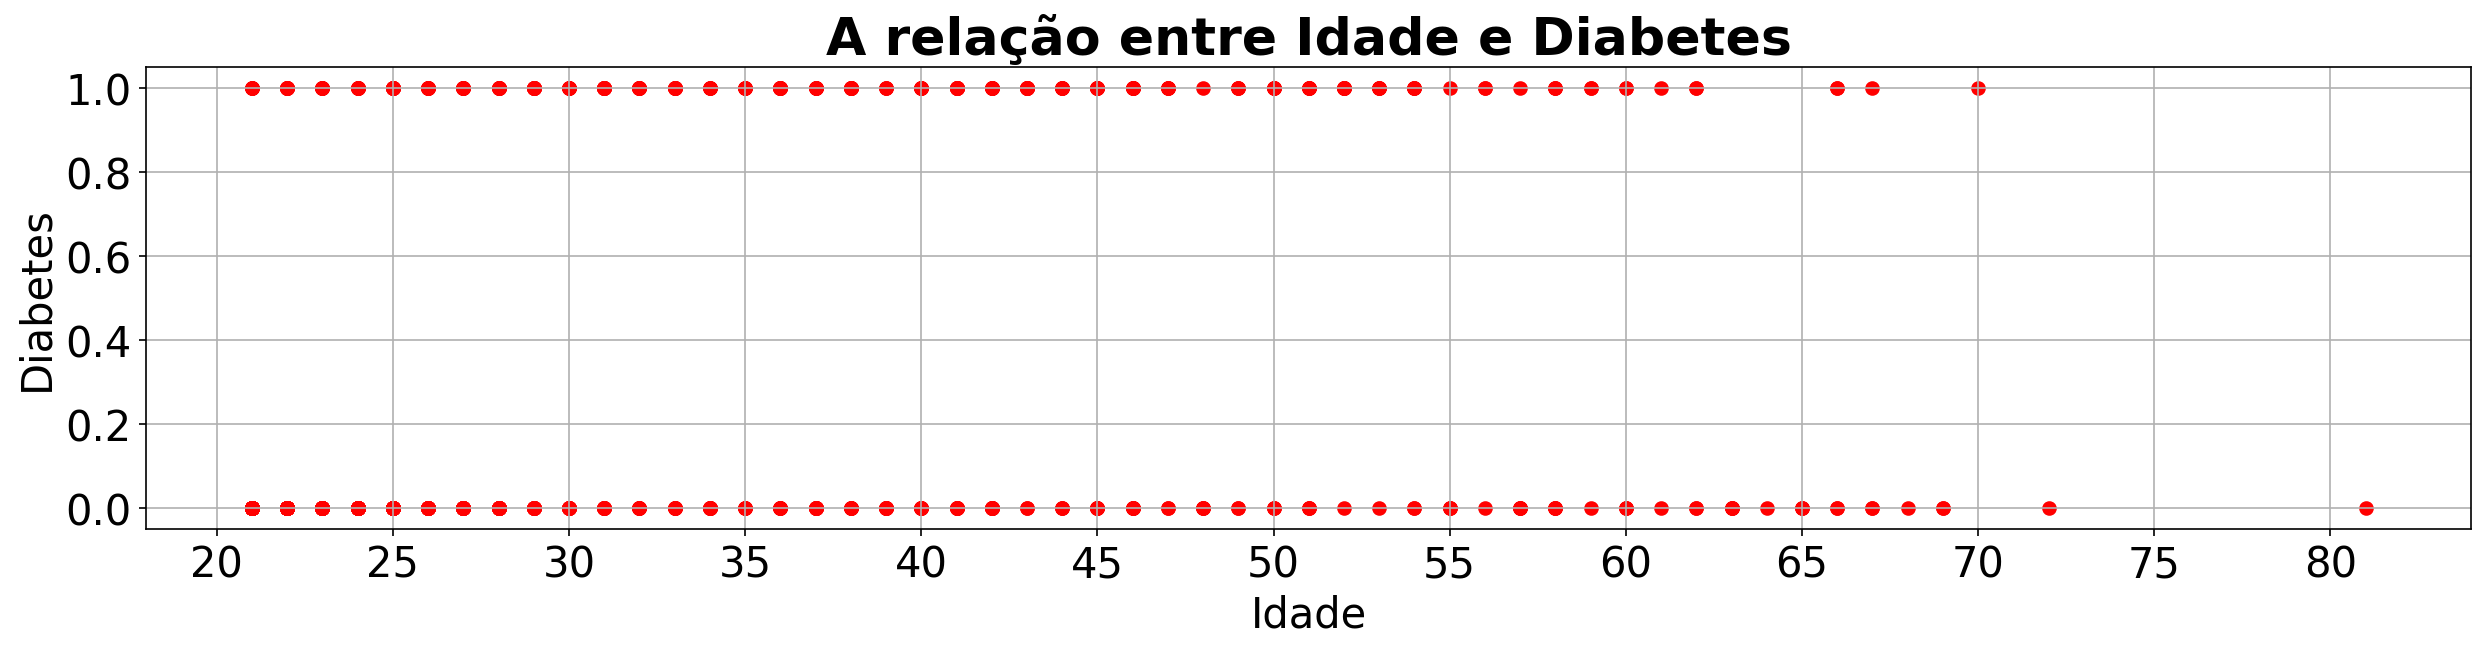

In [16]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (df["Idade"] , df["Resultado"] , color = "red")
plt.title ("A relação entre Idade e Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (20 , 85 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Idade', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

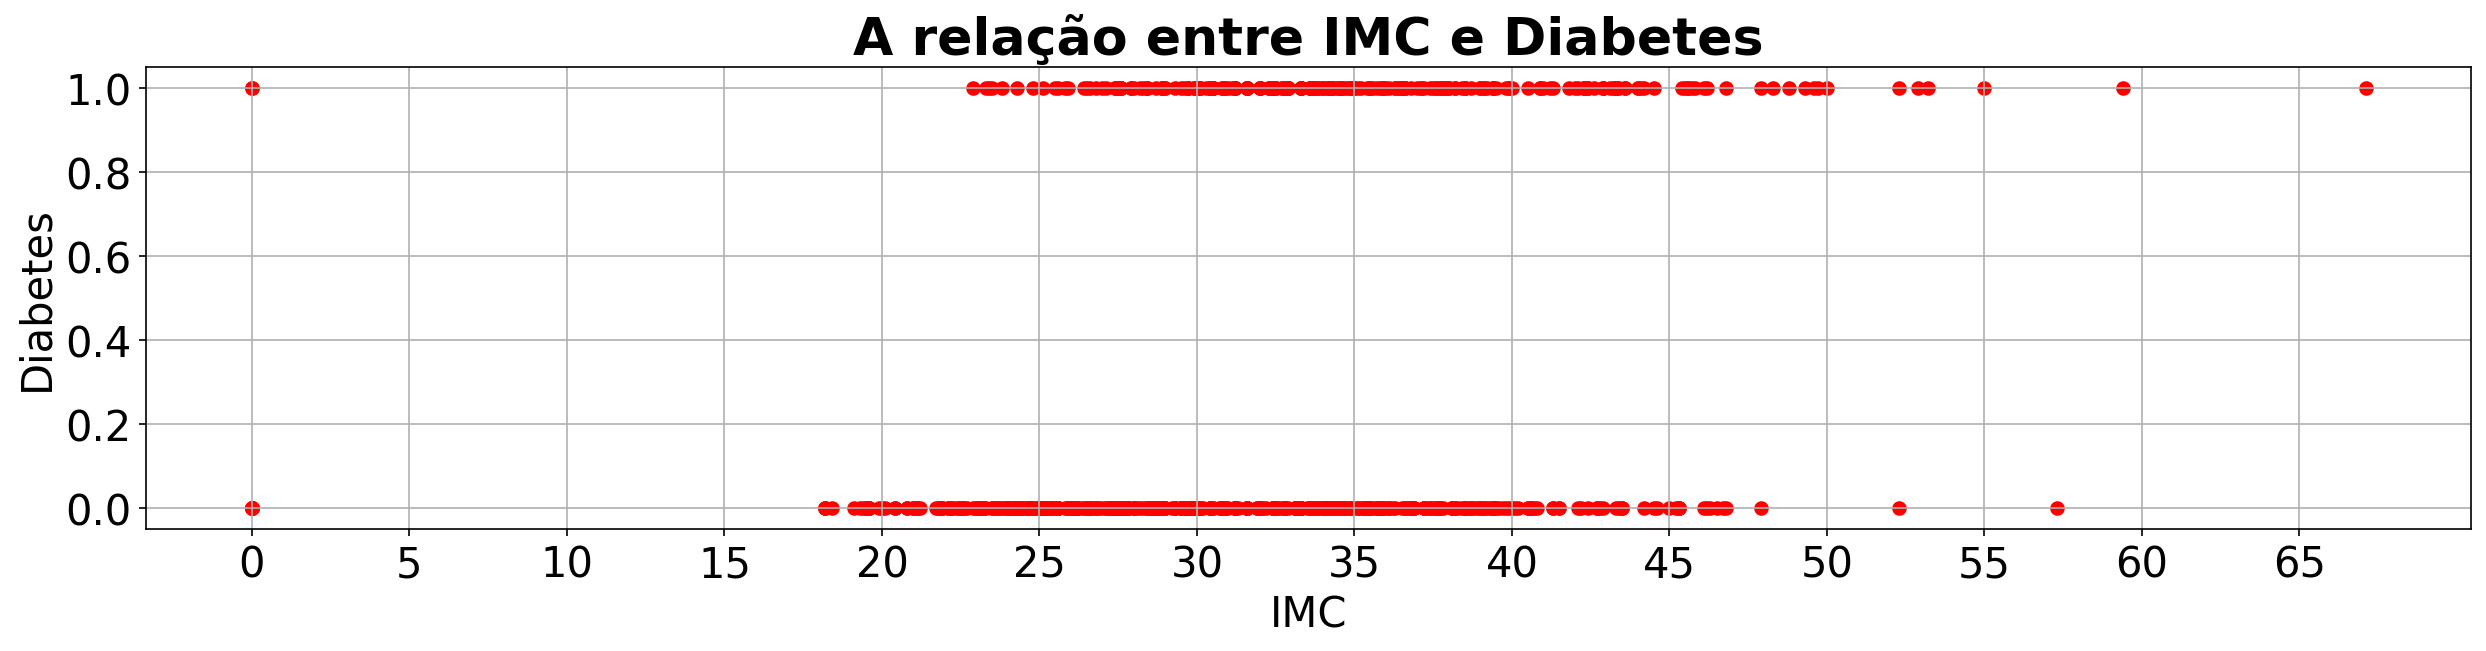

In [17]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (df["IMC"] , df["Resultado"] , color = "red")
plt.title ("A relação entre IMC e Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('IMC', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

<span style="color:blue;font-weight:700;font-size:30px">
 Selecionando as Caracteristicas
</span>

In [18]:
X = pd.DataFrame (data , columns = ["Gravidezes" , "Glicose" , "PressaoSanguinea" , "EspessuraPele" , "Insulina" , "IMC"
                                   , "HistoricoFamiliarDiabetes" , "Idade"]) # Caracteristicas
y = data.Resultado # váriavel que quermos prever

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

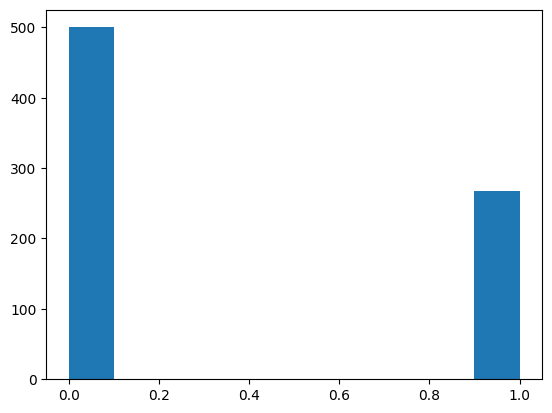

In [19]:
# Dentre 768 pessoas, 268 tem diabetes e 500 não tem.
plt.hist (y)

<span style="color:blue;font-weight:700;font-size:25px">
    Separando treino e teste
</span>

In [20]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.30 , random_state = 42)

In [21]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)                     # escolhendo um modelo
y_pred = logreg.predict(X_test)
y_predicted_proba = logreg.predict_proba(X_test)

In [22]:
print ("Acuracia: " , metrics.accuracy_score (y_test , y_pred))

Acuracia:  0.7532467532467533


In [23]:
model = LogisticRegression (solver = "liblinear"  , C = 10.0 , random_state = 0)
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [24]:
df2 = pd.DataFrame ({"Gravidezes" : [0] , "Glicose" :[80] , "PressaoSanguinea" :[72] ,"EspessuraPele" : [0] ,
                    "Insulina" : [0] , "IMC" : [23] , "HistoricoFamiliarDiabetes" : [0.5] ,
                    "Idade" : [30] , "Resultado" : [0]})
df2

,Gravidezes,Glicose,PressaoSanguinea,EspessuraPele,Insulina,IMC,HistoricoFamiliarDiabetes,Idade,Resultado
0,0,80,72,0,0,23,0.5,30,0


In [25]:
data2 = pd.concat([data, df2], ignore_index=True)

In [26]:
X_train = data2 [["Gravidezes" , "Glicose" , "PressaoSanguinea" , "EspessuraPele" , "Insulina" , "IMC"
                                   , "HistoricoFamiliarDiabetes" , "Idade"]] [:768]
y_train = data2[["Resultado"]][:768].values.reshape (-1,1)

In [27]:
X_test = data2 [["Gravidezes" , "Glicose" , "PressaoSanguinea" , "EspessuraPele" , "Insulina" , "IMC"
                                   , "HistoricoFamiliarDiabetes" , "Idade"]] [768:]

In [28]:
import warnings
warnings.filterwarnings("ignore")

model2 = LogisticRegression (solver = "liblinear"  , C = 10.0 , random_state = 0)
model2.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_pred = model2.predict (X_test)
y_pred

array([0])

In [30]:
novo_paciente = pd.DataFrame([{
    'Gravidezes': 3,
    'Glicose': 171,
    'PressaoSanguinea': 110,
    'EspessuraPele': 24,
    'Insulina': 140,
    'IMC': 45.5,
    'HistoricoFamiliarDiabetes': 0.721,
    'Idade': 53
}])
#9,171,110,24,240,45.4,0.721,54,1

# Fazer a previsão com o modelo treinado
risco_diabetes = model.predict(novo_paciente)
probabilIdade = model.predict_proba(novo_paciente)[0][1]  # probabilIdade de ter diabetes

print("Risco de diabetes:", "Sim" if risco_diabetes[0] == 1 else "Não")
print("ProbabilIdade de diabetes: {:.2f}%".format(probabilIdade * 100))
print(probabilIdade)


Risco de diabetes: Sim
ProbabilIdade de diabetes: 85.24%
0.8523545213139878


In [33]:
import pandas as pd

# Coletando dados do novo paciente via input
email = input("Email do usuário: ")
gravidezes = int(input("Número de gravidezes: "))
glicose = float(input("Nível de glicose: "))
pressao = float(input("Pressão sanguínea: "))
espessura_pele = float(input("Espessura da pele: "))
insulina = float(input("Nível de insulina: "))
imc = float(input("IMC: "))
historico_familiar = float(input("Histórico familiar de diabetes (0 a 1): "))
idade = int(input("Idade: "))

# Criando o DataFrame com os dados inseridos
novo_paciente2 = pd.DataFrame([{
    'Gravidezes': gravidezes,
    'Glicose': glicose,
    'PressaoSanguinea': pressao,
    'EspessuraPele': espessura_pele,
    'Insulina': insulina,
    'IMC': imc,
    'HistoricoFamiliarDiabetes': historico_familiar,
    'Idade': idade
}])

# Fazendo a previsão com o modelo treinado
risco_diabetes = model.predict(novo_paciente2)
probabilidade = model.predict_proba(novo_paciente2)[0][1]

# Preparando os resultados
resultado_risco = "✅ Sim" if risco_diabetes[0] == 1 else "❌ Não"
prob_percentual = probabilidade * 100

# Exibindo os resultados no console
print(f"\n📧 Email: {email}")
print(f"🧪 Risco de diabetes: {resultado_risco}")
print(f"🔢 Probabilidade de diabetes: {prob_percentual:.2f}%")
print(f"\nDados analisados:")
print(f"• Gravidezes: {gravidezes}")
print(f"• Glicose: {glicose}")
print(f"• Pressão sanguínea: {pressao}")
print(f"• Espessura da pele: {espessura_pele}")
print(f"• Insulina: {insulina}")
print(f"• IMC: {imc}")
print(f"• Histórico familiar: {historico_familiar}")
print(f"• Idade: {idade}")


📧 Email: analuisacarneirolisboa@gmail.com
🧪 Risco de diabetes: ✅ Sim
🔢 Probabilidade de diabetes: 98.79%

Dados analisados:
• Gravidezes: 0
• Glicose: 122.0
• Pressão sanguínea: 133.0
• Espessura da pele: 2.0
• Insulina: 55.0
• IMC: 90.0
• Histórico familiar: 1.0
• Idade: 120


![](https://mermaid.ink/img/pako:eNqNU0tu2zAQvQoxqwZQDNEfWeYiQJE0q3rToJtCQDAmJw5RiVQpMkhq-DBF1z2FL9axFAX5NEC1GnL4PvNI7UB7Q6Cgox-JnKYLi9uATeUEfy2GaLVt0UXxtUuHX8H6t52PW3KR3u6vmbn268-VG3ojw-nZ2QBR4tIHR5oENWhrQcKg8Z3Q9eGPs5qrO4vCujbFgWGAPcOfBz5wgREv2TMJ7RvBqJ7lFWI0o8Qnd2QdlNguijbQne0Ov734wKWxOp4M4BFz-kzxC0X2jCLYTnth2LLFDUV6X-_K15xIPOr4DW5sbVmbnrSu--3_UHwBfycPzrPhNDhJZu-H4yEDdamO_8hkvBDO5N5u6HEmemXUec7Vdb4myGAbrAEVQ6IMGmKx4xJ2R-IK4i01VIHi0mD4XkHl9ozhx_DN-2aEBZ-2t6BusO54lVqDcXx1T0fIGQrnPrkIaiV7ClA7uAcli3KyXJaz2VzOiryU5TyDB1BFMVku8kKWi9Uyn82n030GP3vRfFLKfCUXUk7nqwV3GMDBc6br4eX3P0AGmKK_enB68LD_CwBSCvQ?type=png)

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Configurações do email
EMAIL_REMETENTE = "henriqueserafin7@gmail.com"
SENHA_APP = ""

# Defina a cor do resultado
resultado_cor = "green" if resultado_risco == "✅ Sim" else "red"

# Corpo do email em HTML
corpo_email_html = f"""
<html>
<head>
  <style>
    body {{
      font-family: Arial, sans-serif;
      background-color: #f4f4f4;
      padding: 20px;
    }}
    .container {{
      background-color: #fff;
      padding: 30px;
      border-radius: 8px;
      box-shadow: 0 0 10px rgba(0,0,0,0.1);
      max-width: 500px;
      margin: auto;
    }}
    h1 {{
      color: #0056b3;
      text-align: center;
    }}
    .result {{
      font-size: 1.2em;
      font-weight: bold;
      color: #007bff;
    }}
    .risk {{
      color: {resultado_cor};
      font-weight: bold;
    }}
    .data-list {{
      list-style-type: none;
      padding: 0;
    }}
    .data-list li {{
      margin-bottom: 8px;
    }}
    .important {{
      color: #dc3545;
      font-weight: bold;
    }}
    .footer {{
      margin-top: 20px;
      text-align: center;
      color: #777;
    }}
  </style>
</head>
<body>
  <div class="container">
    <h1>Resultados da Análise de Risco de Diabetes</h1>
    <p>Olá!</p>
    <p>Aqui estão os resultados da sua análise de risco de diabetes:</p>
    <p class="result">🧪 Risco de diabetes: <span class="risk">{resultado_risco}</span></p>
    <p class="result">🔢 Probabilidade de diabetes: {prob_percentual:.2f}%</p>
    <p>Dados analisados:</p>
    <ul class="data-list">
      <li>Gravidezes: {gravidezes}</li>
      <li>Glicose: {glicose}</li>
      <li>Pressão sanguínea: {pressao}</li>
      <li>Espessura da pele: {espessura_pele}</li>
      <li>Insulina: {insulina}</li>
      <li>IMC: {imc}</li>
      <li>Histórico familiar: {historico_familiar}</li>
      <li>Idade: {idade}</li>
    </ul>
    <p class="important">⚠️ IMPORTANTE: Este resultado é apenas uma análise preditiva e não substitui a consulta médica profissional.</p>
    <div class="footer">
      Atenciosamente,<br>
      Sistema de Análise de Diabetes
    </div>
  </div>
</body>
</html>
"""



![](https://mermaid.ink/img/pako:eNp9ks9q4zAQxl9FzGkXvCG2iezo0Eu7sIdNd2H_HBZDUORJImpr3LEU2oY8TI99jrzYKg5uC4HqpNF8308zGu3BUI2goMf7gM7gjdUb1m3lRFydZm-N7bTz4k8fjs9s6TJzSx5XRHeXmb-a7fF5h7av3Dk7Ur5cXY02Jb4-oAleCy3M8aUJjT5rR0HUvoGU-LHyx5dWMPah8bqmJdveUCI6ptWyQzbofNBNImIfO1vjE_aJQG8mF9S3Cm5wbR2-YxriD-QLcrHcqOloia22zXLr20Z86j1btxHffi--izVxqyNLf_4A9JMxvpcWu9f-xBCj21kSNYmBDgls2NagPAdMoMVIPoWwP6Er8FtssQIVt7Xmuwoqd4ieOIJ_RO1oYwqbLai1bvoYha7Wfpz26ymjq5GvKTgPaj4gQO3hAVRaFJMsl9kslzM5K8syTeARlMwmRTmd59M8z1JZylQeEngabp1OSlkW8uSRWVrMZ0UCWFtPvDh_ueHnJaCDp1-PzpzrPPwHHqHiBA?type=png)

In [35]:
# Configurando o email
msg = MIMEMultipart('alternative')
msg['From'] = EMAIL_REMETENTE
msg['To'] = email
msg['Subject'] = "Resultados da Análise de Risco de Diabetes"

# Anexando o HTML ao email
msg.attach(MIMEText(corpo_email_html, 'html'))

try:
    # Conectando ao servidor Gmail
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(EMAIL_REMETENTE, SENHA_APP)
    server.sendmail(EMAIL_REMETENTE, email, msg.as_string())
    server.quit()
    print(f"\n✅ Email enviado com sucesso para {email}!")
except Exception as e:
    print(f"\n❌ Erro ao enviar email: {str(e)}")


✅ Email enviado com sucesso para analuisacarneirolisboa@gmail.com!


![](https://mermaid.ink/img/pako:eNqVU9tq20AQ_ZVln2RQhG2hS_QQMImggcqY2n0pArORxvIS7Y6zl-DU-GP6Lf2xrOTYuHWJqZ52dnTOnDMzu6MV1kAzquHFgqzggbNGMVFK4r4NU4ZXfMOkIVM08IT4fJmZg3rlNap5sZhdZr9r-_uX4ljKQ-7Ic3N3dzxm5F5xRorHIi9sa3gHJ57QzeATyAOsuASiQIABacAnNWjDJTN9OQKEaW2lwU84JhK2jFSoNrgEwXi7XBvREobEFf-H4HOnTjRKqAwjnhZmEzQdPqhQZFGaDK5AtXEWTau9az-22HDp5cXk8evyW17ki3y6yH0yz6dfJsvJbHa1EMi6E3ZJ0fv1O6MB00ttFJeNN_jgOye5-XNSKFdcCUZAvrouo3UTMKiku1DqNGTWurWwFWj90f6_RB6XIiP5lj8BESA1a0C4GRJ9joNWA8l75v-kgRPIteDqLLWLQAUvlhtvQH3aKF7TzCgLPhXg_HYh3XUsJTVrt3QlzdyxZuq5pKXcO4xb9x-I4ghTaJs1zVbMWfCp3dTMHF_X6VY5baDu0e0pzUZhz0GzHd26KEmCcRiPozCO4ihN05FP32gWj4MkHd6GwzAcj-I0HsV7n_7syw6DNE6TuMPE41FyG0U-hZq76RSHN94_dZ8ya3D-JquD0P07KwtWPA?type=png)